<a href="https://colab.research.google.com/github/pankajagrawal925/Sentiment-Analysis-Using-Lexicons/blob/master/Sentiment_Analysis_Lexicons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install textblob

In [0]:
import textblob

In [0]:
!pip install contractions

     |████████████████████████████████| 317kB 4.1MB/s 
     |████████████████████████████████| 245kB 40.3MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81707 sha256=e87ff71cb8f2f473c0306e3e62ba48a4d795ef4d3cb1e952e6a48a104ce9a7e7
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [72]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem import WordNetLemmatizer, PorterStemmer
ps = PorterStemmer()
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
from sklearn.model_selection import train_test_split
from sklearn import svm
import itertools
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import tqdm
import contractions
from bs4 import BeautifulSoup
import unicodedata
import gensim


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dataset = pd.read_csv('/content/drive/My Drive/movie_reviews.csv')

In [58]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review       50000 non-null object
sentiment    50000 non-null object
dtypes: object(2)
memory usage: 781.4+ KB


In [62]:
dataset.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

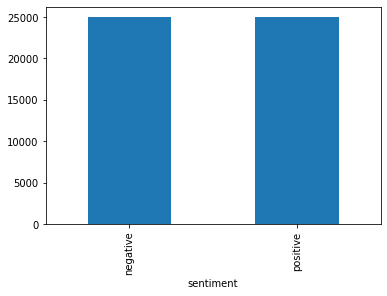

In [63]:
dataset.groupby('sentiment').review.count().plot.bar(ylim=0)
plt.show()


In [65]:
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])

reviews.shape,sentiments.shape


((50000,), (50000,))

In [0]:
# extract data for model evaluation
test_reviews = reviews[35000:]
test_sentiments = sentiments[35000:]

# **SENTIMENT ANALYSIS USING TEXTBLOB**


# Predict sentiment for test datset

In [0]:
sentiment_polarity = [textblob.TextBlob(review).sentiment.polarity for review in test_reviews]

In [0]:
predicted_sentiments = ['positive' if score >= 0.1 else 'negative'  for score in sentiment_polarity]

**EVALUATING THE MODEL PERFORMANCE**

In [76]:
from sklearn.metrics import confusion_matrix, classification_report
labels = ['negative', 'positive']
print(classification_report(test_sentiments, predicted_sentiments))
pd.DataFrame(confusion_matrix(test_sentiments, predicted_sentiments), index=labels, columns=labels)

              precision    recall  f1-score   support

    negative       0.77      0.76      0.76      7490
    positive       0.76      0.78      0.77      7510

    accuracy                           0.77     15000
   macro avg       0.77      0.77      0.77     15000
weighted avg       0.77      0.77      0.77     15000



,negative,positive
negative,5668,1822
positive,1675,5835


# **Sentiment Analysis with VADER**

In [84]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentiment_vader_lexicon(review, 
                                    threshold=0.1,
                                    verbose=False):    
    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    final_sentiment = 'positive' if agg_score >= threshold\
                                   else 'negative'
    
    return final_sentiment

**Predict Sentiment for test Dataset**

In [0]:
predicted_sentiments = [analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=False) for review in test_reviews]

In [86]:
labels = ['negative', 'positive']
print(classification_report(test_sentiments, predicted_sentiments))
pd.DataFrame(confusion_matrix(test_sentiments, predicted_sentiments), index=labels, columns=labels)

              precision    recall  f1-score   support

    negative       0.78      0.59      0.67      7490
    positive       0.67      0.83      0.74      7510

    accuracy                           0.71     15000
   macro avg       0.72      0.71      0.71     15000
weighted avg       0.72      0.71      0.71     15000



,negative,positive
negative,4429,3061
positive,1272,6238
